# [DHS Program API](https://api.dhsprogram.com/#/introapi.cfm)




**Surveys**<br />
*Provides a list of surveys that have survey data available through the DHS Program. The DHS Program contains hundreds of surveys including Demographic and Health Surveys (DHS), Malaria Indicator Surveys (MIS), Service Provision Assessments (SPA), AIDS Indicator Surveys (AIS), and others.*
- [List of Surveys](https://api.dhsprogram.com/rest/dhs/surveys?returnFields=SurveyId,SurveyYearLabel,SurveyType,CountryName&f=html)
- *Demographic and Health Surveys (DHS)*
- MZ1997DHS Mozambique DHS 1997
- MZ2003DHS Mozambique DHS 2003
- MZ2009AIS Mozambique AIS 2009
- **MZ2011DHS Mozambique DHS 2011**
- MZ2015AIS Mozambique AIS 2015
- MZ2018MIS Mozambique MIS 2018

**Indicator Data**<br />
*Provides specific survey indicator data on a national, subnational or disaggregated level.*

**Indicators**<br />
*Percentage of households whose main source of drinking water is*
- **WS_SRCE_H_IMP	Households using an improved water source**
- WS_SRCE_H_BOT	Households using bottled water
- WS_SRCE_H_TOT	Households: Total
- [List of Indicators](https://api.dhsprogram.com/rest/dhs/indicators?returnFields=IndicatorId,Label,Definition&f=html)

**Countries**<br />
- [List of Countries](https://api.dhsprogram.com/rest/dhs/countries?returnFields=CountryName,DHS_CountryCode&f=html)
- **Mozambique = MZ**

**Geometry**<br />
*Provides a list of coordinates that have geometry data available through The DHS Program.*
- [Geometry Examples](https://api.dhsprogram.com/rest/dhs/geometry/examples)

**Tags**<br />
- [List of Tags](https://api.dhsprogram.com/rest/dhs/tags?&f=html)

---

[GeoJSON.io Test](http://geojson.io/#map=2/20.0/0.0)<br />
[RFC7946 - The GeoJSON Format](https://datatracker.ietf.org/doc/html/rfc7946)<br />

In [1]:
import json
from urllib.request import urlopen
import pprint

In [2]:
# Funktion definieren, mit der die Api einfach abgerufen werden kann

def dhs_abfrage(query: str):
    #Import libraries.
    
    api_key = ',THKOLN-051622'
    #Query the API for a list of countries.
    
    # DATA-API Url
    #url = 'https://api.dhsprogram.com/rest/dhs/data/'
    # Geometry-v8-API Url
    url = 'https://api.dhsprogram.com/rest/dhs/v8/geometry/'
    
    #form = '?f=geojson&returnGeometry=true'
    form = ''
    api_url = f'{url}{query}{api_key}{form}'
    
    
    # TESTDATEN !!!
    
    ## MZ = Mozambique
    ## WS_SRCE_H_IMP = Households using an improved water source
    
    # Api-General-Test
    #api_url = r'https://api.dhsprogram.com/rest/dhs/data?countryIds=MZ&f=json'
    
    # TH-Api-Key Test
    #api_url = 'https://api.dhsprogram.com/rest/dhs/data/MZ,WS_SRCE_H_IMP,THKOLN-051622'
    
    # Test Data + Geodaten (geojson)
    api_url = 'https://api.dhsprogram.com/rest/dhs/data/KE2014DHS,WS_SRCE_H_TOT?f=geojson&returnGeometry=true'
    # keine geodaten für MZ & WS_SRCE_H_IMP
    
    # Test Geo-API
    #api_url = 'https://api.dhsprogram.com/rest/dhs/v8/geometry/MZ,WS_SRCE_H_IMP'
    
    
    # -----------------------------
    #api_url = 'https://api.dhsprogram.com/rest/dhs/surveys?indicatorIds=FP_CUSM_W_ANY&countryIds=MZ&surveyIds=MZ1997DHS,MZ2003DHS,MZ2009AIS,MZ2011DHS,MZ2015AIS,MZ2018MIS,THKOLN-051622&lang=en&returnGeometry=true&f=geojson'
    
    # ?perpage=50
    # Einschränken der Datenwiedergabe auf Sides
    
    # Format-Typen
    # HTML
    # JSON
    # PJSON
    # geoJSON
    # JSONP
    # XML
    # CSV
    
    # Obtain and Parse the list into a Python Object.
    req = urlopen(api_url)
    resp = json.loads(req.read())
    
    return resp

In [3]:
# Test query = Households using an improved water source
abfrage = 'MZ,WS_SRCE_H_IMP'

test_data = dhs_abfrage(abfrage)

In [4]:
# Testdaten printen lassen und geojson befüllen
pprint.pprint(test_data)
with open("geojsonreturn.geojson", "w") as text_file:
    text_file.write(str(test_data))

{'crs': {'properties': {'name': 'ESPG:4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[39.2651, -4.6582],
                                             [39.2871, -4.6582],
                                             [39.2871, -4.6802],
                                             [39.2651, -4.6582]],
                                            [[39.375, -4.6582],
                                             [39.375, -4.6802],
                                             [39.353, -4.6802],
                                             [39.353, -4.6582],
                                             [39.375, -4.6582]],
                                            [[41.0449, -2.1533],
                                             [41.0669, -2.1533],
                                             [41.0669, -2.1753],
                                             [41.0449, -2.1753],
                                             [41.0449, -2.1533]],
                             

In [5]:
for i in test_data['features']:
    pprint.pprint(i)

{'geometry': {'coordinates': [[[39.2651, -4.6582],
                               [39.2871, -4.6582],
                               [39.2871, -4.6802],
                               [39.2651, -4.6582]],
                              [[39.375, -4.6582],
                               [39.375, -4.6802],
                               [39.353, -4.6802],
                               [39.353, -4.6582],
                               [39.375, -4.6582]],
                              [[41.0449, -2.1533],
                               [41.0669, -2.1533],
                               [41.0669, -2.1753],
                               [41.0449, -2.1753],
                               [41.0449, -2.1533]],
                              [[41.1328, -2.1094],
                               [41.1108, -2.1094],
                               [41.1108, -2.1313],
                               [41.1108, -2.1533],
                               [41.0889, -2.1533],
                               [4

                               [40.9131, 4.1528],
                               [40.9131, 4.1309],
                               [40.9351, 4.1309],
                               [40.957, 4.1309],
                               [40.979, 4.1309],
                               [41.001, 4.1089],
                               [41.0229, 4.1089],
                               [41.0229, 4.0869],
                               [41.0449, 4.0649],
                               [41.0449, 4.043],
                               [41.0669, 4.043],
                               [41.0669, 4.021],
                               [41.0889, 4.021],
                               [41.0889, 3.999],
                               [41.1108, 3.999],
                               [41.1108, 3.9771],
                               [41.1328, 3.9771],
                               [41.1328, 3.9551],
                               [41.1548, 3.9551],
                               [41.1768, 3.9551],
         

In [6]:
# In dieser Zelle wird versucht, aus den Polygondaten eine Karte zu erstellen

import shapely.geometry
import geopandas
shapely_polygon = shapely.geometry.Polygon([(0, 0), (0, 1), (1, 0)])


geopandas.GeoSeries([shapely_polygon]).__geo_interface__




{'bbox': (0.0, 0.0, 1.0, 1.0),
 'features': [{'bbox': (0.0, 0.0, 1.0, 1.0),
   'geometry': {'coordinates': (((0.0, 0.0),
      (0.0, 1.0),
      (1.0, 0.0),
      (0.0, 0.0)),),
    'type': 'Polygon'},
   'id': '0',
   'properties': {},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

{'bbox': (0.0, 0.0, 1.0, 1.0),
 'features': [{'bbox': (0.0, 0.0, 1.0, 1.0),
   'geometry': {'coordinates': (((0.0, 0.0),
      (0.0, 1.0),
      (1.0, 0.0),
      (0.0, 0.0)),),
    'type': 'Polygon'},
   'id': '0',
   'properties': {},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

---

## DHS Data Api
#### Mozambique
##### Percentage of households whose main source of drinking water is an improved source

https://api.dhsprogram.com/rest/dhs/data/MZ,WS_SRCE_H_IMP,THKOLN-051622

```{'DataId': 281028,
 'SurveyId': 'MZ1997DHS',
 'Indicator': 'Households using an improved water source',
 'IsPreferred': 1,
 'Value': 20.7,
 'SDRID': 'WSSRCEHIMP',
 'Precision': 1,
 'RegionId': '',
 'SurveyYearLabel': '1997',
 'SurveyType': 'DHS',
 'SurveyYear': 1997,
 'IndicatorOrder': 230161010,
 'DHS_CountryCode': 'MZ',
 'CILow': '',
 'CountryName': 'Mozambique',
 'IndicatorType': 'I',
 'CharacteristicId': 1000,
 'CharacteristicCategory': 'Total',
 'IndicatorId': 'WS_SRCE_H_IMP',
 'CharacteristicOrder': 0,
 'CharacteristicLabel': 'Total',
 'ByVariableLabel': '',
 'DenominatorUnweighted': 9282.0,
 'DenominatorWeighted': 9282.0,
 'CIHigh': '',
 'IsTotal': 1,
 'ByVariableId': 0,
 'LevelRank': ''}```
 
---

## Geometry Api
#### Mozambique
##### Percentage of households whose main source of drinking water is an improved source

https://api.dhsprogram.com/rest/dhs/v8/geometry/MZ,WS_SRCE_H_IMP

```{'CountryCode': 'MZ',
 'SurveyId': 'MZ1997DHS',
 'SurveyType': 'DHS',
 'SurveyYear': 1997,
 'CountryName': 'Mozambique',
 'LevelRank': 1,
 'Coordinates': 'POLYGON ((32.99447 -25.96944, 32.99367 -25.97589, 32.99039 -25.98086, 32.99039 -25.98172, 32.98867 -25.98253, 32.987 -25.98586, 32.98531 -25.98672, 32.98531 -25.98917, 32.982 -25.99422, 32.97953 -25.99842, 32.97992 -25.99961, 32.98192 -26, 32.98103 -26.00242, 32.97775 -26.00667, 32.97775 -26.00825, 32.97436 -26.01244, 32.97361 -26.01664, 32.97278 -26.01744, 32.97278 -26.02908, 32.97189 -26.02995, 32.97189 -26.03578, 32.97106 -26.03664, 32.97106 -26.03911, 32.96942 -26.04164, 32.96942 -26.04417, 32.96858 -26.04494, 32.96858 -26.04747, 32.96695 -26.04994, 32.96695 -26.05414, 32.96611 -26.055, 32.96522 -26.05658, 32.96611 -26.06497, 32.96439 -26.06578, 32.96439 -26.06828, 32.96028 -26.07161, 32.95945 -26.07581, 32.95817 -26.07786, 32.9557 -26.07786, 32.95525 -26.06994, 32.95689 -26.06742, 32.95525 -26.06497, 32.95525 -26.05997, 32.95317 -26.05953, 32.9515 -26.05786, 32.94897 -26.05706, 32.94695 -26.05411, 32.94695 -26.05081, 32.94439 -26.04994, 32.94359 -26.04828, 32.94359 -26.04414, 32.94275 -26.04328, 32.94195 -26.03664, 32.93939 -26.03244, 32.93567 -26.03039, 32.92981 -26.03039, 32.92734 -26.02872, 32.92233 -26.02872, 32.91942 -26.02658, 32.92106 -26.02578, 32.91897 -26.02539, 32.91686 -26.02331, 32.91686 -26.02244, 32.91814 -26.02119, 32.9207 -26.02119, 32.92233 -26.02286, 32.92361 -26.02247, 32.92361 -26.02161, 32.9207 -26.01953, 32.91483 -26.01953, 32.91358 -26.02081, 32.91275 -26.02244, 32.91358 -26.02331, 32.91358 -26.02492, 32.91108 -26.02744, 32.91108 -26.02911, 32.91275 -26.03078, 32.91275 -26.03244, 32.91356 -26.03331, 32.91356 -26.03494, 32.91611 -26.03828, 32.91692 -26.04247, 32.91903 -26.04533, 32.91895 -26.03783, 32.92067 -26.03783, 32.92231 -26.04036, 32.92359 -26.03994, 32.92275 -26.03742, 32.91942 -26.03244, 32.91986 -26.03122, 32.92195 -26.03244, 32.92442 -26.03661, 32.92689 -26.03828, 32.92772 -26.04161, 32.92861 -26.04247, 32.92861 -26.04494, 32.92772 -26.04575, 32.9277 -26.04828, 32.92611 -26.05158, 32.92403 -26.0545, 32.92231 -26.0545, 32.92192 -26.05578, 32.91736 -26.05789, 32.91564 -26.0595, 32.91153 -26.06036, 32.91025 -26.06495, 32.90775 -26.06747, 32.90775 -26.07078, 32.9065 -26.07119, 32.90439 -26.06828, 32.90442 -26.05994, 32.90148 -26.05956, 32.89945 -26.05742, 32.90106 -26.05497, 32.899 -26.05289, 32.89819 -26.05289, 32.89692 -26.05078, 32.9015 -26.04786, 32.90194 -26.04658, 32.90358 -26.04328, 32.90358 -26.03828, 32.90022 -26.03414, 32.90025 -26.03161, 32.90272 -26.02664, 32.90772 -26.02158, 32.90772 -26.02078, 32.91022 -26.01828, 32.91022 -26.01661, 32.91192 -26.01494, 32.91442 -26.00994, 32.91442 -26.00497, 32.91606 -26.00245, 32.91733 -26.00119, 32.92108 -26, 32.92573 -25.99881, 32.92617 -25.99672, 32.92992 -25.99294, 32.93492 -25.99294, 32.93659 -25.99208, 32.93867 -25.98756, 32.93995 -25.98631, 32.94242 -25.98545, 32.9445 -25.98756, 32.9445 -25.99003, 32.94578 -25.99131, 32.94909 -25.99131, 32.95078 -25.99208, 32.95408 -25.99628, 32.95656 -25.99628, 32.95828 -25.99547, 32.96158 -25.99131, 32.96322 -25.99131, 32.96658 -25.98878, 32.96906 -25.98878, 32.97197 -25.98672, 32.97286 -25.98339, 32.97781 -25.97672, 32.97781 -25.97422, 32.97534 -25.97089, 32.97656 -25.96797, 32.9832 -25.96797, 32.98409 -25.96883, 32.98828 -25.96964, 32.99075 -25.96797, 32.99322 -25.96797, 32.9945 -25.96922, 32.99447 -25.96944), (32.92783 -25.97005, 32.92661 -25.97133, 32.92573 -25.97047, 32.92156 -25.97047, 32.91989 -25.97133, 32.91617 -25.97506, 32.9145 -25.97839, 32.9145 -25.98089, 32.91331 -25.98211, 32.91075 -25.98211, 32.90367 -25.97669, 32.90367 -25.97506, 32.90531 -25.97339, 32.90492 -25.97297, 32.90156 -25.97378, 32.90036 -25.97258, 32.90492 -25.96881, 32.90911 -25.96881, 32.91078 -25.97133, 32.91325 -25.96967, 32.91661 -25.96795, 32.92661 -25.96881, 32.92783 -25.97005), (32.90322 -25.96633, 32.90156 -25.96881, 32.89864 -25.96839, 32.90322 -25.96467, 32.90495 -25.96461, 32.90614 -25.96586, 32.90322 -25.96633), (32.90283 -25.96253, 32.89828 -25.96633, 32.897 -25.96506, 32.89784 -25.96339, 32.90075 -25.96133, 32.90159 -25.96133, 32.90283 -25.96253), (32.71034 -25.90919, 32.70447 -25.91755, 32.70161 -25.92133, 32.70036 -25.92172, 32.70033 -25.92339, 32.69703 -25.92592, 32.6945 -25.93089, 32.69367 -25.93169, 32.69367 -25.93422, 32.692 -25.93753, 32.68992 -25.93964, 32.68533 -25.93925, 32.68453 -25.93672, 32.687 -25.93505, 32.68581 -25.93381, 32.68408 -25.93378, 32.68117 -25.93172, 32.68161 -25.93044, 32.68531 -25.93006, 32.68531 -25.92839, 32.68203 -25.92508, 32.68239 -25.923, 32.68575 -25.923, 32.68659 -25.9213, 32.68825 -25.9205, 32.69078 -25.92044, 32.69161 -25.91964, 32.69325 -25.91964, 32.69409 -25.92044, 32.697 -25.91839, 32.69906 -25.90961, 32.70075 -25.90964, 32.70322 -25.91217, 32.70495 -25.91211, 32.70622 -25.91089, 32.70534 -25.90925, 32.70698 -25.90758, 32.70698 -25.90506, 32.70825 -25.90467, 32.71034 -25.90758, 32.71034 -25.90919), (32.72617 -25.89172, 32.72281 -25.89172, 32.72364 -25.88839, 32.72783 -25.88342, 32.72783 -25.88175, 32.72614 -25.88008, 32.72614 -25.87506, 32.72703 -25.87425, 32.72703 -25.87172, 32.72825 -25.87133, 32.7295 -25.87253, 32.7295 -25.87506, 32.73034 -25.87592, 32.73031 -25.87839, 32.72867 -25.88008, 32.73031 -25.88175, 32.73031 -25.88336, 32.72947 -25.88422, 32.72947 -25.88589, 32.72617 -25.89172), (32.6445 -25.91839, 32.64494 -25.91878, 32.64742 -25.91628, 32.64825 -25.91628, 32.64869 -25.91758, 32.63992 -25.92714, 32.63909 -25.92714, 32.63534 -25.93086, 32.63534 -25.93172, 32.63367 -25.93258, 32.63283 -25.93505, 32.62869 -25.93922, 32.62869 -25.94008, 32.61953 -25.95003, 32.61953 -25.95089, 32.61572 -25.95294, 32.61075 -25.95711, 32.60994 -25.95711, 32.60619 -25.96089, 32.60453 -25.96422, 32.60281 -25.96586, 32.60281 -25.96753, 32.59783 -25.97756, 32.59781 -25.98008, 32.59322 -25.98545, 32.58828 -25.98545, 32.58575 -25.98383, 32.58408 -25.98383, 32.57828 -25.98047, 32.57661 -25.98047, 32.57409 -25.97881, 32.57245 -25.97881, 32.56739 -25.97547, 32.56492 -25.97464, 32.56072 -25.97131, 32.55908 -25.97131, 32.55409 -25.96711, 32.55245 -25.96711, 32.55117 -25.96589, 32.55117 -25.96422, 32.547 -25.95922, 32.54703 -25.95756, 32.54242 -25.95383, 32.54159 -25.95383, 32.53703 -25.94922, 32.53622 -25.9467, 32.53242 -25.94294, 32.52825 -25.94047, 32.51911 -25.94044, 32.51619 -25.94336, 32.51619 -25.94422, 32.51492 -25.94461, 32.51391 -25.94586, 32.51048 -25.93435, 32.51288 -25.93246, 32.51762 -25.93042, 32.5213 -25.92925, 32.52458 -25.9279, 32.53268 -25.92494, 32.53719 -25.92198, 32.54259 -25.91847, 32.5477 -25.91442, 32.55313 -25.90496, 32.55827 -25.89252, 32.56161 -25.87843, 32.56196 -25.86543, 32.5629 -25.85433, 32.56566 -25.83565, 32.56753 -25.81533, 32.569 -25.81002, 32.57292 -25.81128, 32.64316 -25.83462, 32.69869 -25.85411, 32.6987 -25.85508, 32.6995 -25.85589, 32.6995 -25.85756, 32.70031 -25.85836, 32.70031 -25.86422, 32.7012 -25.86508, 32.70117 -25.86839, 32.702 -25.86919, 32.702 -25.87172, 32.70284 -25.87258, 32.702 -25.87339, 32.70117 -25.87758, 32.69906 -25.8805, 32.69658 -25.88214, 32.69495 -25.88214, 32.68656 -25.88544, 32.68325 -25.88797, 32.67661 -25.88803, 32.67578 -25.88961, 32.67322 -25.89047, 32.67203 -25.89172, 32.67286 -25.89253, 32.67283 -25.89506, 32.67159 -25.89631, 32.66828 -25.89631, 32.66497 -25.90217, 32.66242 -25.903, 32.66158 -25.90461, 32.66078 -25.90461, 32.65161 -25.91467, 32.64825 -25.91467, 32.64742 -25.91547, 32.64661 -25.91547, 32.6445 -25.91839))',
 'RegionID': 'MZDHS1997431011'}```
 
---

## Geometry Api
#### Mozambique
##### Percentage of households: Total

KE2014DHS,WS_SRCE_H_TOT

https://api.dhsprogram.com/rest/dhs/v8/geometry/MZ,WS_SRCE_H_IMP

```{'CountryCode': 'MZ',
 'SurveyId': 'MZ1997DHS',
 'SurveyType': 'DHS',
 'SurveyYear': 1997,
 'CountryName': 'Mozambique',
 'LevelRank': 1,
 'Coordinates': 'POLYGON ((32.99447 -25.96944, 32.99367 -25.97589, 32.99039 -25.98086, 32.99039 -25.98172, 32.98867 -25.98253, 32.987 -25.98586, 32.98531 -25.98672, 32.98531 -25.98917, 32.982 -25.99422, 32.97953 -25.99842, 32.97992 -25.99961, 32.98192 -26, 32.98103 -26.00242, 32.97775 -26.00667, 32.97775 -26.00825, 32.97436 -26.01244, 32.97361 -26.01664, 32.97278 -26.01744, 32.97278 -26.02908, 32.97189 -26.02995, 32.97189 -26.03578, 32.97106 -26.03664, 32.97106 -26.03911, 32.96942 -26.04164, 32.96942 -26.04417, 32.96858 -26.04494, 32.96858 -26.04747, 32.96695 -26.04994, 32.96695 -26.05414, 32.96611 -26.055, 32.96522 -26.05658, 32.96611 -26.06497, 32.96439 -26.06578, 32.96439 -26.06828, 32.96028 -26.07161, 32.95945 -26.07581, 32.95817 -26.07786, 32.9557 -26.07786, 32.95525 -26.06994, 32.95689 -26.06742, 32.95525 -26.06497, 32.95525 -26.05997, 32.95317 -26.05953, 32.9515 -26.05786, 32.94897 -26.05706, 32.94695 -26.05411, 32.94695 -26.05081, 32.94439 -26.04994, 32.94359 -26.04828, 32.94359 -26.04414, 32.94275 -26.04328, 32.94195 -26.03664, 32.93939 -26.03244, 32.93567 -26.03039, 32.92981 -26.03039, 32.92734 -26.02872, 32.92233 -26.02872, 32.91942 -26.02658, 32.92106 -26.02578, 32.91897 -26.02539, 32.91686 -26.02331, 32.91686 -26.02244, 32.91814 -26.02119, 32.9207 -26.02119, 32.92233 -26.02286, 32.92361 -26.02247, 32.92361 -26.02161, 32.9207 -26.01953, 32.91483 -26.01953, 32.91358 -26.02081, 32.91275 -26.02244, 32.91358 -26.02331, 32.91358 -26.02492, 32.91108 -26.02744, 32.91108 -26.02911, 32.91275 -26.03078, 32.91275 -26.03244, 32.91356 -26.03331, 32.91356 -26.03494, 32.91611 -26.03828, 32.91692 -26.04247, 32.91903 -26.04533, 32.91895 -26.03783, 32.92067 -26.03783, 32.92231 -26.04036, 32.92359 -26.03994, 32.92275 -26.03742, 32.91942 -26.03244, 32.91986 -26.03122, 32.92195 -26.03244, 32.92442 -26.03661, 32.92689 -26.03828, 32.92772 -26.04161, 32.92861 -26.04247, 32.92861 -26.04494, 32.92772 -26.04575, 32.9277 -26.04828, 32.92611 -26.05158, 32.92403 -26.0545, 32.92231 -26.0545, 32.92192 -26.05578, 32.91736 -26.05789, 32.91564 -26.0595, 32.91153 -26.06036, 32.91025 -26.06495, 32.90775 -26.06747, 32.90775 -26.07078, 32.9065 -26.07119, 32.90439 -26.06828, 32.90442 -26.05994, 32.90148 -26.05956, 32.89945 -26.05742, 32.90106 -26.05497, 32.899 -26.05289, 32.89819 -26.05289, 32.89692 -26.05078, 32.9015 -26.04786, 32.90194 -26.04658, 32.90358 -26.04328, 32.90358 -26.03828, 32.90022 -26.03414, 32.90025 -26.03161, 32.90272 -26.02664, 32.90772 -26.02158, 32.90772 -26.02078, 32.91022 -26.01828, 32.91022 -26.01661, 32.91192 -26.01494, 32.91442 -26.00994, 32.91442 -26.00497, 32.91606 -26.00245, 32.91733 -26.00119, 32.92108 -26, 32.92573 -25.99881, 32.92617 -25.99672, 32.92992 -25.99294, 32.93492 -25.99294, 32.93659 -25.99208, 32.93867 -25.98756, 32.93995 -25.98631, 32.94242 -25.98545, 32.9445 -25.98756, 32.9445 -25.99003, 32.94578 -25.99131, 32.94909 -25.99131, 32.95078 -25.99208, 32.95408 -25.99628, 32.95656 -25.99628, 32.95828 -25.99547, 32.96158 -25.99131, 32.96322 -25.99131, 32.96658 -25.98878, 32.96906 -25.98878, 32.97197 -25.98672, 32.97286 -25.98339, 32.97781 -25.97672, 32.97781 -25.97422, 32.97534 -25.97089, 32.97656 -25.96797, 32.9832 -25.96797, 32.98409 -25.96883, 32.98828 -25.96964, 32.99075 -25.96797, 32.99322 -25.96797, 32.9945 -25.96922, 32.99447 -25.96944), (32.92783 -25.97005, 32.92661 -25.97133, 32.92573 -25.97047, 32.92156 -25.97047, 32.91989 -25.97133, 32.91617 -25.97506, 32.9145 -25.97839, 32.9145 -25.98089, 32.91331 -25.98211, 32.91075 -25.98211, 32.90367 -25.97669, 32.90367 -25.97506, 32.90531 -25.97339, 32.90492 -25.97297, 32.90156 -25.97378, 32.90036 -25.97258, 32.90492 -25.96881, 32.90911 -25.96881, 32.91078 -25.97133, 32.91325 -25.96967, 32.91661 -25.96795, 32.92661 -25.96881, 32.92783 -25.97005), (32.90322 -25.96633, 32.90156 -25.96881, 32.89864 -25.96839, 32.90322 -25.96467, 32.90495 -25.96461, 32.90614 -25.96586, 32.90322 -25.96633), (32.90283 -25.96253, 32.89828 -25.96633, 32.897 -25.96506, 32.89784 -25.96339, 32.90075 -25.96133, 32.90159 -25.96133, 32.90283 -25.96253), (32.71034 -25.90919, 32.70447 -25.91755, 32.70161 -25.92133, 32.70036 -25.92172, 32.70033 -25.92339, 32.69703 -25.92592, 32.6945 -25.93089, 32.69367 -25.93169, 32.69367 -25.93422, 32.692 -25.93753, 32.68992 -25.93964, 32.68533 -25.93925, 32.68453 -25.93672, 32.687 -25.93505, 32.68581 -25.93381, 32.68408 -25.93378, 32.68117 -25.93172, 32.68161 -25.93044, 32.68531 -25.93006, 32.68531 -25.92839, 32.68203 -25.92508, 32.68239 -25.923, 32.68575 -25.923, 32.68659 -25.9213, 32.68825 -25.9205, 32.69078 -25.92044, 32.69161 -25.91964, 32.69325 -25.91964, 32.69409 -25.92044, 32.697 -25.91839, 32.69906 -25.90961, 32.70075 -25.90964, 32.70322 -25.91217, 32.70495 -25.91211, 32.70622 -25.91089, 32.70534 -25.90925, 32.70698 -25.90758, 32.70698 -25.90506, 32.70825 -25.90467, 32.71034 -25.90758, 32.71034 -25.90919), (32.72617 -25.89172, 32.72281 -25.89172, 32.72364 -25.88839, 32.72783 -25.88342, 32.72783 -25.88175, 32.72614 -25.88008, 32.72614 -25.87506, 32.72703 -25.87425, 32.72703 -25.87172, 32.72825 -25.87133, 32.7295 -25.87253, 32.7295 -25.87506, 32.73034 -25.87592, 32.73031 -25.87839, 32.72867 -25.88008, 32.73031 -25.88175, 32.73031 -25.88336, 32.72947 -25.88422, 32.72947 -25.88589, 32.72617 -25.89172), (32.6445 -25.91839, 32.64494 -25.91878, 32.64742 -25.91628, 32.64825 -25.91628, 32.64869 -25.91758, 32.63992 -25.92714, 32.63909 -25.92714, 32.63534 -25.93086, 32.63534 -25.93172, 32.63367 -25.93258, 32.63283 -25.93505, 32.62869 -25.93922, 32.62869 -25.94008, 32.61953 -25.95003, 32.61953 -25.95089, 32.61572 -25.95294, 32.61075 -25.95711, 32.60994 -25.95711, 32.60619 -25.96089, 32.60453 -25.96422, 32.60281 -25.96586, 32.60281 -25.96753, 32.59783 -25.97756, 32.59781 -25.98008, 32.59322 -25.98545, 32.58828 -25.98545, 32.58575 -25.98383, 32.58408 -25.98383, 32.57828 -25.98047, 32.57661 -25.98047, 32.57409 -25.97881, 32.57245 -25.97881, 32.56739 -25.97547, 32.56492 -25.97464, 32.56072 -25.97131, 32.55908 -25.97131, 32.55409 -25.96711, 32.55245 -25.96711, 32.55117 -25.96589, 32.55117 -25.96422, 32.547 -25.95922, 32.54703 -25.95756, 32.54242 -25.95383, 32.54159 -25.95383, 32.53703 -25.94922, 32.53622 -25.9467, 32.53242 -25.94294, 32.52825 -25.94047, 32.51911 -25.94044, 32.51619 -25.94336, 32.51619 -25.94422, 32.51492 -25.94461, 32.51391 -25.94586, 32.51048 -25.93435, 32.51288 -25.93246, 32.51762 -25.93042, 32.5213 -25.92925, 32.52458 -25.9279, 32.53268 -25.92494, 32.53719 -25.92198, 32.54259 -25.91847, 32.5477 -25.91442, 32.55313 -25.90496, 32.55827 -25.89252, 32.56161 -25.87843, 32.56196 -25.86543, 32.5629 -25.85433, 32.56566 -25.83565, 32.56753 -25.81533, 32.569 -25.81002, 32.57292 -25.81128, 32.64316 -25.83462, 32.69869 -25.85411, 32.6987 -25.85508, 32.6995 -25.85589, 32.6995 -25.85756, 32.70031 -25.85836, 32.70031 -25.86422, 32.7012 -25.86508, 32.70117 -25.86839, 32.702 -25.86919, 32.702 -25.87172, 32.70284 -25.87258, 32.702 -25.87339, 32.70117 -25.87758, 32.69906 -25.8805, 32.69658 -25.88214, 32.69495 -25.88214, 32.68656 -25.88544, 32.68325 -25.88797, 32.67661 -25.88803, 32.67578 -25.88961, 32.67322 -25.89047, 32.67203 -25.89172, 32.67286 -25.89253, 32.67283 -25.89506, 32.67159 -25.89631, 32.66828 -25.89631, 32.66497 -25.90217, 32.66242 -25.903, 32.66158 -25.90461, 32.66078 -25.90461, 32.65161 -25.91467, 32.64825 -25.91467, 32.64742 -25.91547, 32.64661 -25.91547, 32.6445 -25.91839))',
 'RegionID': 'MZDHS1997431011'}```
 
---

---

In [7]:
"""from geojson import Point, Feature, FeatureCollection, dump

point = Point((-115.81, 37.24))

features = []
features.append(Feature(geometry=point, properties={"country": "Spain"}))

# add more features...
# features.append(...)

feature_collection = FeatureCollection(features)

with open('myfile.geojson', 'w') as f:
    dump(feature_collection, f)"""

'from geojson import Point, Feature, FeatureCollection, dump\n\npoint = Point((-115.81, 37.24))\n\nfeatures = []\nfeatures.append(Feature(geometry=point, properties={"country": "Spain"}))\n\n# add more features...\n# features.append(...)\n\nfeature_collection = FeatureCollection(features)\n\nwith open(\'myfile.geojson\', \'w\') as f:\n    dump(feature_collection, f)'

In [8]:
import pandas as pd
joinedsurveys = 'joined-surveys-2013-grouped.csv'
joinedsurveys = pd.read_csv(joinedsurveys, sep=',')

joinedsurveys

# auf "stadtteil"/xx level
# keine rohdaten
# schon verarbeitete daten

,Unnamed: 0,ID,cluster,residence,year,piped,groundwater,surface water,rain,external source,bottled water
0,0,AOHR71FL,1.0,Rural,2016.0,0.0,0.0,26.0,0.0,0.0,0.0
1,1,AOHR71FL,2.0,Urban,2015.0,0.0,0.0,0.0,0.0,26.0,0.0
2,2,AOHR71FL,3.0,Urban,2016.0,0.0,0.0,0.0,0.0,26.0,0.0
3,3,AOHR71FL,4.0,Rural,2016.0,0.0,7.0,19.0,0.0,0.0,0.0
4,4,AOHR71FL,5.0,Rural,2015.0,0.0,9.0,16.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
25974,25974,JOHR73FL,966.0,Rural,2017.0,16.0,0.0,0.0,0.0,0.0,4.0
25975,25975,JOHR73FL,967.0,Rural,2017.0,19.0,0.0,0.0,0.0,0.0,0.0
25976,25976,JOHR73FL,968.0,Rural,2017.0,20.0,0.0,0.0,0.0,0.0,0.0
25977,25977,JOHR73FL,969.0,Rural,2017.0,10.0,0.0,0.0,0.0,0.0,10.0


## Ergebnisse DHS Api

Leider konnten wir keine Ergebnisse mit der Api verzeichnen. Dies lag daran, dass die Daten nicht pro Ort vorhanden sind, sondern nur als Polygon pro Provinz. Wir haben also nur Daten auf Provinzebene.

Dies ist für uns leider unbrauchbar, da die Umfragen auf Stadtebene passiert sind.

Ein weiteres Problem war, dass es eine sehr große Anzahl an Label gab, die nicht gebündelt waren. Diese müssten in einem vorherigen Schritt noch zusammengefasst werden, damit man eine allgemeine Abfrage schreiben kann.

Sollte die Api kleingranulare Daten in Zukunft aufweisen, könnten diese für unsere Analyse relevant sein.

---
---
---

# GEO-Visualisierung

Ziel dieser Visualisierung ist es, die einzelnen Umfragewerte zu "elementary access", "improved access", "limited access" und "other" auf einer Karte darzustellen.
Die Umfragewerte stellen die Label dar, die wir im Endeffekt visualisiern möchten

In [9]:
#!pip install pyshp

In [10]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [11]:
# Zunächst müssen wir die beiden Dataframes zu den Umfragewerten und der shp Datei, mit der die Karte 
# visualisiert wird, mergen, um einen Dataframe zu bekommen, mit dem man weiterarbeiten kann

# shp-Datei als Dataframe (df1) laden.
shp_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MZGE7AFL\\MZGE7AFL.shp'
df1 = gpd.read_file(shp_path)

# Die Cluster-ID (DHSCLUST) zum späteren mergen in eine Zahl (integer) ändern
df1['DHSCLUST'] = df1['DHSCLUST'].astype(int)
df1 = df1[df1.SOURCE == 'GPS']
df1 = df1[['DHSCLUST', 'DHSREGNA', 'LATNUM', 'LONGNUM', 'geometry']]

# die neuen Suvey Label in einen Dataframe (df2) laden.
survey_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\survey_new_label.xlsx'
df2 = pd.read_excel(survey_path, sheet_name='New_data')
# Die Cluster-ID (ClusterId/DHSCLUST) zum mergen in eine Zahl (integer) ändern
df2['DHSCLUST'] = df2['ClusterId'].astype(int)
df2 = df2.drop(columns='ClusterId')

# Mergen der beiden Dataframes anhand der Cluster-ID (DHSCLUST)
df = pd.merge(df1, df2, how='inner', on='DHSCLUST')

#df.to_pickle('merged_df.pickle')
#df.to_csv('merged_df.csv')
df

,DHSCLUST,DHSREGNA,LATNUM,LONGNUM,geometry,elementary_access,improved_access,limited_access,other
0,101,Niassa,-13.285618,35.231138,POINT (35.23114 -13.28562),15.0,2.0,11.0,NaN
1,102,Niassa,-13.322655,35.255217,POINT (35.25522 -13.32266),16.0,8.0,3.0,NaN
2,103,Niassa,-13.271620,35.196597,POINT (35.19660 -13.27162),27.0,NaN,1.0,NaN
3,104,Niassa,-14.811983,36.563687,POINT (36.56369 -14.81198),10.0,18.0,NaN,NaN
4,105,Niassa,-14.788214,36.514077,POINT (36.51408 -14.78821),16.0,12.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
216,1116,Maputo City,-25.928557,32.537460,POINT (32.53746 -25.92856),NaN,24.0,NaN,NaN
217,1117,Maputo City,-25.855033,32.596222,POINT (32.59622 -25.85503),NaN,27.0,NaN,NaN
218,1118,Maputo City,-25.900300,32.564611,POINT (32.56461 -25.90030),NaN,27.0,NaN,NaN
219,1119,Maputo City,-25.861141,32.604641,POINT (32.60464 -25.86114),1.0,25.0,NaN,NaN


In [12]:
# Laden der vordefinierten Mozambique Karte (moz_admbnda_adm1_ine_20190607.shp)
mozambique_file = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MOZA\\moz_admbnda_adm1_ine_20190607.shp'
mozambique = gpd.read_file(mozambique_file)

# Ersetzen von NaN und Whitespace um sub-Dataframes zu erstellen
df = df.replace(np.nan, '')
df = df.replace(' ', '')

# Erstellen eines Dataframes (ea) mit der aufsummierten Anzahl aller new survey lables "elementary_access"
ea = df[df.elementary_access != '']
ea = ea[['elementary_access', 'DHSREGNA', 'geometry']]
ea['elementary_access'] = ea['elementary_access'].astype(int)
eaRegNa = ea.groupby(['DHSREGNA']).sum()

# Erstellen eines Dataframes (ia) mit der aufsummierten Anzahl aller new survey lables "improved_access"
ia = df[df.improved_access != '']
ia = ia[['improved_access', 'DHSREGNA', 'geometry']]
ia['improved_access'] = ia['improved_access'].astype(int)
iaRegNa = ia.groupby(['DHSREGNA']).sum()

# Erstellen eines Dataframes (la) mit der aufsummierten Anzahl aller new survey lables "limited_access"
la = df[df.limited_access != '']
la = la[['limited_access', 'DHSREGNA', 'geometry']]
la['limited_access'] = la['limited_access'].astype(int)
laRegNa = la.groupby(['DHSREGNA']).sum()

# Erstellen eines Dataframes (oa) mit der aufsummierten Anzahl aller new survey lables "other"
oa = df[df.other != '']
oa = oa[['other', 'DHSREGNA', 'geometry']]
oa['other'] = oa['other'].astype(int)
oaRegNa = oa.groupby(['DHSREGNA']).sum()

In [13]:
# Anpassung der Regionnamen der Mozambique-Karte, um die new survey lable Dataframes mit dieser zu mergen
mozambique.rename(columns = {'ADM1_PT':'DHSREGNA'}, inplace = True)
eaMoza = pd.merge(mozambique, eaRegNa, how='left', on='DHSREGNA')
iaMoza = pd.merge(mozambique, iaRegNa, how='left', on='DHSREGNA')
laMoza = pd.merge(mozambique, laRegNa, how='left', on='DHSREGNA')
oaMoza = pd.merge(mozambique, oaRegNa, how='left', on='DHSREGNA')

<AxesSubplot:>

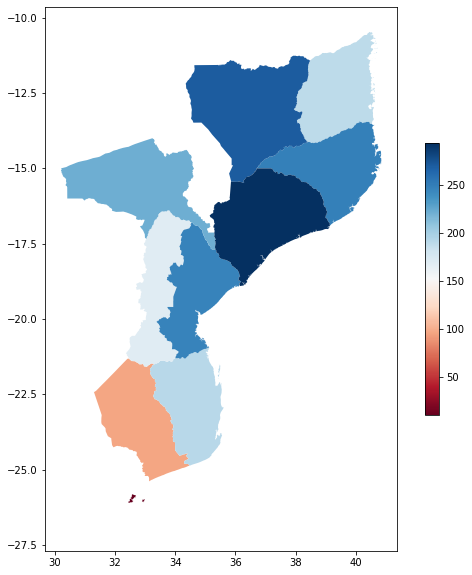

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
eaMoza.plot(ax=ax, cmap='RdBu', column='elementary_access', legend=True, legend_kwds={'shrink':0.5})

<AxesSubplot:>

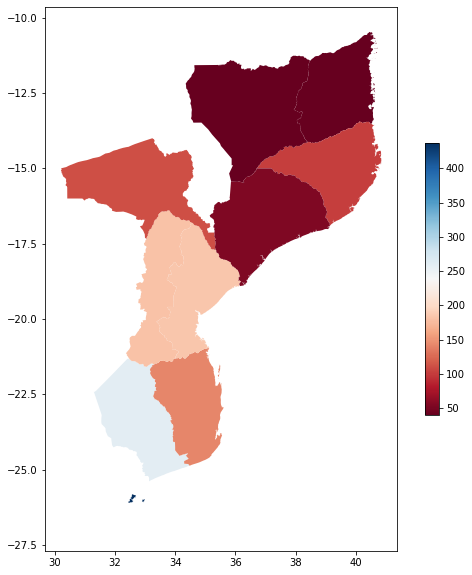

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
iaMoza.plot(ax=ax, cmap='RdBu', column='improved_access', legend=True, legend_kwds={'shrink':0.5})

<AxesSubplot:>

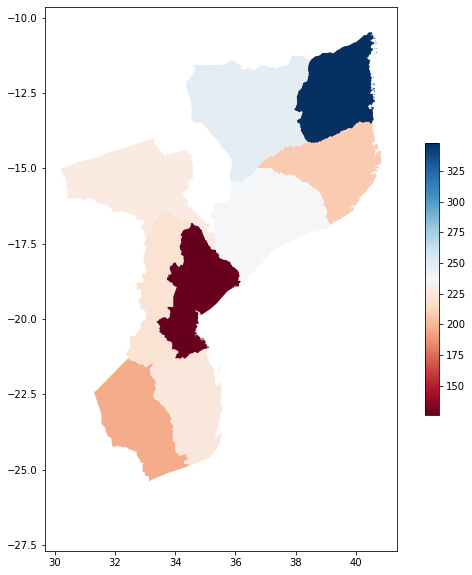

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
laMoza.plot(ax=ax, cmap='RdBu', column='limited_access', legend=True, legend_kwds={'shrink':0.5})

<AxesSubplot:>

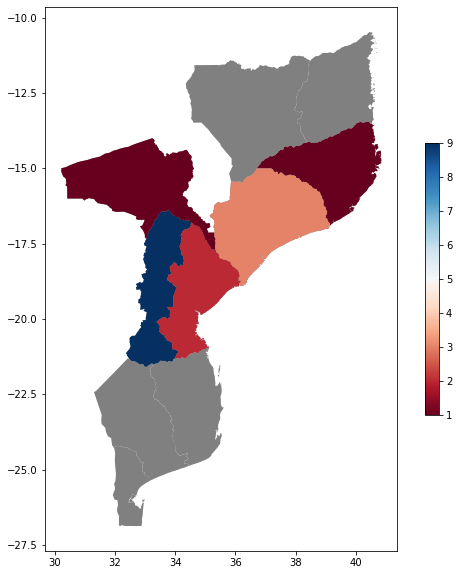

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
mozambique.plot(ax=ax, color='grey')
oaMoza.plot(ax=ax, cmap='RdBu', column='other', legend=True, legend_kwds={'shrink':0.5})

## Visualisierung

Für die weitere Visualisierung haben wir vier Plots erstellt, mit denen die einzelnen Label auf der Karte angezeigt werden

<AxesSubplot:>

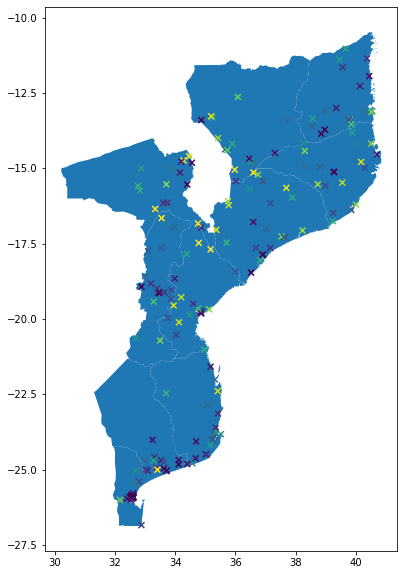

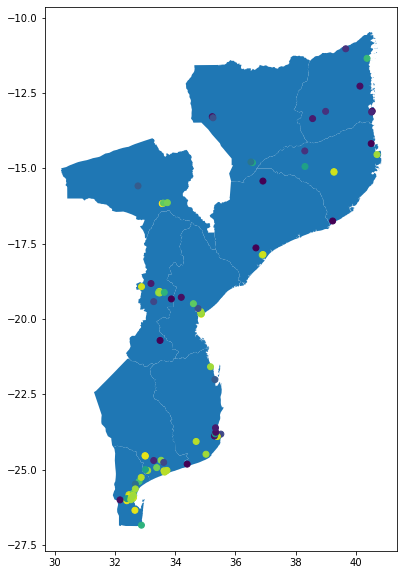

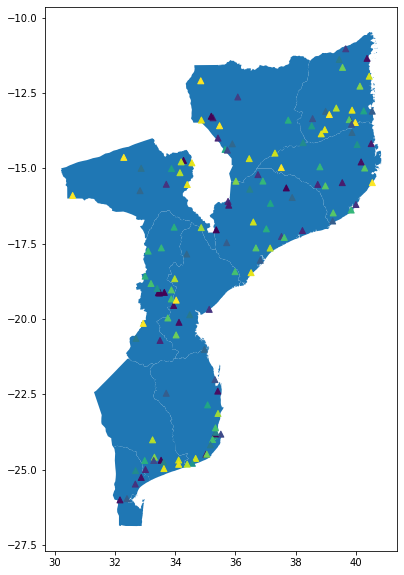

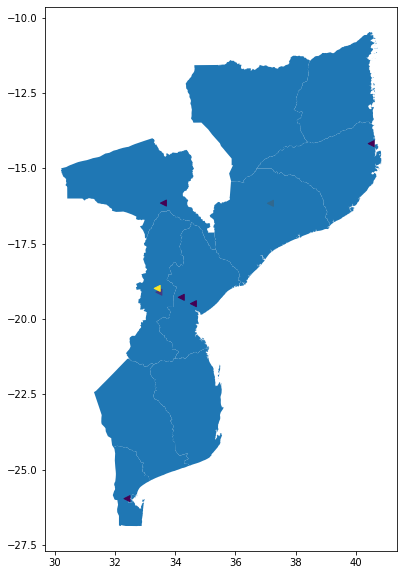

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Einlesen der Datei
mozambique_file = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MOZA\\moz_admbnda_adm1_ine_20190607.shp'
mozambique = gpd.read_file(mozambique_file)

# Erstellen der einzelnen Plots für jedes Label
fig, ax = plt.subplots(figsize=(10,10))
mozambique.plot(ax=ax)
ea.plot(ax=ax, column='elementary_access', marker='x')

# Erstellen der einzelnen Plots für jedes Label
fig, bx = plt.subplots(figsize=(10,10))
mozambique.plot(ax=bx)
ia.plot(ax=bx, column='improved_access', marker='o')

# Erstellen der einzelnen Plots für jedes Label
fig, cx = plt.subplots(figsize=(10,10))
mozambique.plot(ax=cx)
la.plot(ax=cx, column='limited_access', marker='^')

# Erstellen der einzelnen Plots für jedes Label
fig, dx = plt.subplots(figsize=(10,10))
mozambique.plot(ax=dx)
oa.plot(ax=dx, column='other', marker='<')

<AxesSubplot:>

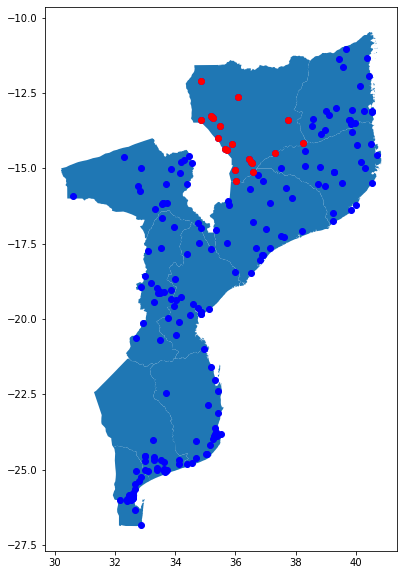

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

mozam = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MOZA\\moz_admbnda_adm1_ine_20190607.shp'
df = gpd.read_file(mozam)

fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax = ax)

shp_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MZGE7AFL\\MZGE7AFL.shp'

df2 = gpd.read_file(shp_path)
df2 = df2[df2.SOURCE == 'GPS']
df3 = df2[df2.DHSREGNA == 'Niassa']

df2.plot(ax = ax, color='blue')
df3.plot(ax = ax, color='red')

# First Steps, Tests und irrelevante Funktionen
---

In [20]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

NameError: name 'sf' is not defined

In [ ]:
regioncoords = df.groupby('DHSREGNA')['coords'].apply(list).to_dict()

"""for city , coords in regioncoords.items():
    poly = []
    for coord in coords:
        for a,b in coord:
            poly.append(a)
            poly.append(b)"""
x_lon = []
y_lat = []          
for city , coords in regioncoords.items():
    for coord in coords:
        for a,b in coord:
            x_lon.append(a)
            y_lat.append(b)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

shp_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MZGE7AFL\\MZGE7AFL.shp'

df = gpd.read_file(shp_path)
df = df[df.SOURCE == 'GPS']
SA1 = df[df.DHSREGNA == 'Niassa']

# die erste eigene ausgabe der GPS Daten auf Regionebene
fig, ax = plt.subplots()
df.plot(ax = ax, color='blue')
SA1.plot(ax = ax, color='red')

In [ ]:
# Test Funktion zum plotten einer spezifischen shape
# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

comuna = 'Nampula'
com_id = df[df.ADM1NAME == comuna].index.get_values()[0]
# ? com_id = df[df.ADM1NAME == comuna].index.to_numpy()

#plot_shape(com_id, comuna)

#print(com_id)

In [ ]:
# Test Funktion welche die Geograph daten als Map plotten soll
# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
plot_map(sf)